In [2]:
library(ggplot2)
library(dplyr)
library(tidyr)


Attachement du package : ‘dplyr’


Les objets suivants sont masqués depuis ‘package:stats’:

    filter, lag


Les objets suivants sont masqués depuis ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
df = read.table('predation_date.csv',h=TRUE,sep=',')
df

date     plot session spot class  specie_name           
1  20_11_02 LP   LP4     3LP4 lizard calotes_versicolor    
2  20_11_02 LP   LP4     3LP4 lizard calotes_versicolor    
3  20_10_22 PC   PC3     4PC3 lizard calotes_versicolor    
4  20_11_19 PC   PC5     5PC5 lizard calotes_versicolor    
5  20_11_26 LP   LP5     1LP5 rodent mus_musculus          
6  20_10_26 PE   PE4     1PE4 rodent mus_musculus          
7  20_09_07 SL   SL1     5SL1 rodent mus_musculus          
8  20_09_07 SL   SL1     5SL1 rodent mus_musculus          
9  20_11_30 PE   PE3     5PE3 frog   Sclerophrys_gutturalis
10 20_09_17 BM   BM1     5BM1 rodent suncus_murinus        
11 20_09_17 BM   BM1     5BM1 rodent suncus_murinus        
12 20_10_19 BM   BM3     2BM3 rodent suncus_murinus        
13 20_11_05 BM   BM4     5BM4 rodent suncus_murinus        
14 20_11_05 BM   BM4     5BM4 rodent suncus_murinus        
15 20_09_03 LP   LP1     5LP1 rodent suncus_murinus        
16 20_09_03 LP   LP1     5LP1 rodent suncus_murinus        
17 20_09_28 LP   LP2     3LP2 rodent suncus_murinus        
18 20_09_28 LP   LP2     3LP2 rodent suncus_murinus        
19 20_09_28 LP   LP2     5LP2 rodent suncus_murinus        
20 20_09_28 LP   LP2     5LP2 rodent suncus_murinus        
21 20_10_15 LP   LP3     3LP3 rodent suncus_murinus        
22 20_10_15 LP   LP3     3LP3 rodent suncus_murinus        
23 20_10_15 LP   LP3     4LP3 rodent suncus_murinus        
24 20_10_15 LP   LP3     4LP3 rodent suncus_murinus        
25 20_10_15 LP   LP3     5LP3 rodent suncus_murinus        
26 20_10_15 LP   LP3     5LP3 rodent suncus_murinus        
27 20_11_02 LP   LP4     4LP4 rodent suncus_murinus        
28 20_11_02 LP   LP4     4LP4 rodent suncus_murinus        
29 20_11_02 LP   LP4     5LP4 rodent suncus_murinus        
30 20_11_02 LP   LP4     5LP4 rodent suncus_murinus        
⋮  ⋮        ⋮    ⋮       ⋮    ⋮      ⋮                     
53 20_10_26 PE   PE4     4PE4 rodent suncus_murinus        
54 20_10_26 PE   PE4     4PE4 rodent suncus_murinus        
55 20_10_26 PE   PE4     5PE4 rodent suncus_murinus        
56 20_11_12 PE   PE5     1PE5 rodent suncus_murinus        
57 20_11_12 PE   PE5     3PE5 rodent suncus_murinus        
58 20_11_12 PE   PE5     4PE5 rodent suncus_murinus        
59 20_11_12 PE   PE5     5PE5 rodent suncus_murinus        
60 20_11_12 PE   PE5     5PE5 rodent suncus_murinus        
61 20_09_07 SL   SL1     4SL1 rodent suncus_murinus        
62 20_09_07 SL   SL1     4SL1 rodent suncus_murinus        
63 20_10_12 SL   SL3     3SL3 rodent suncus_murinus        
64 20_10_12 SL   SL3     3SL3 rodent suncus_murinus        
65 20_09_03 LP   LP1     2LP1 unseen unseen                
66 20_11_02 LP   LP4     1LP4 unseen unseen                
67 20_11_02 LP   LP4     1LP4 unseen unseen                
68 20_10_01 PC   PC2     4PC2 unseen unseen                
69 20_10_22 PC   PC3     1PC3 unseen unseen                
70 20_10_22 PC   PC3     1PC3 unseen unseen                
71 20_09_14 PE   PE1     3PE1 unseen unseen                
72 20_10_26 PE   PE4     5PE4 unseen unseen                
73 20_09_07 SL   SL1     3SL1 unseen unseen                
74 20_09_25 SL   SL2     3SL2 unseen unseen                
75 20_09_25 SL   SL2     3SL2 unseen unseen                
76 20_09_25 SL   SL2     4SL2 unseen unseen                
77 20_09_25 SL   SL2     4SL2 unseen unseen                
78 20_09_25 SL   SL2     5SL2 unseen unseen                
79 20_10_30 SL   SL4     2SL4 unseen unseen                
80 20_10_30 SL   SL4     2SL4 unseen unseen                
81 20_10_30 SL   SL4     4SL4 unseen unseen                
82 20_11_16 SL   SL5     3SL5 unseen unseen                
   pred_image                   confidence note FN why_FN         id_conf
1  P1880669_2020_11_02_15_28_40 0               1  weather+static 1      
2  P1880669_2020_11_02_15_28_40 0               1  weather+static 1      
3  P1830058_2020_10_23_10_07_34 1               1            

# Barplot identified predator

In [4]:
df = read.table('predation_date.csv',h=TRUE,sep=',')
head(df)

# base df
pred_df = df %>% 
  group_by(specie_name) %>% 
  summarise(count = n())

pred_df = rbind(pred_df, data.frame(specie_name = as.factor("recovered"), count = 250-sum(pred_df$count))) 

head(pred_df)



date     plot session spot class  specie_name       
1 20_11_02 LP   LP4     3LP4 lizard calotes_versicolor
2 20_11_02 LP   LP4     3LP4 lizard calotes_versicolor
3 20_10_22 PC   PC3     4PC3 lizard calotes_versicolor
4 20_11_19 PC   PC5     5PC5 lizard calotes_versicolor
5 20_11_26 LP   LP5     1LP5 rodent mus_musculus      
6 20_10_26 PE   PE4     1PE4 rodent mus_musculus      
  pred_image                   confidence note FN why_FN         id_conf
1 P1880669_2020_11_02_15_28_40 0               1  weather+static 1      
2 P1880669_2020_11_02_15_28_40 0               1  weather+static 1      
3 P1830058_2020_10_23_10_07_34 1               1                 1      
4 P2110422_2020_11_20_08_14_06 1               0                 1      
5 P2160007_2020_11_26_22_30_26 1               0                 2      
6 P1840796_2020_10_26_23_58_38 1               0                 1      
  image_name year month day hour min sec
1 P1880669   2020 11     2  15   28  40 
2 P1880669   2020 11     2  15   28  40 
3 P1830058   2020 10    23  10    7  34 
4 P2110422   2020 11    20   8   14   6 
5 P2160007   2020 11    26  22   30  26 
6 P1840796   2020 10    26  23   58  38

specie_name            count
1 calotes_versicolor       4  
2 mus_musculus             4  
3 Sclerophrys_gutturalis   1  
4 suncus_murinus          55  
5 unseen                  18  
6 recovered              168

In [5]:
df_cumsum = pred_df%>%
arrange(specie_name)%>%
mutate(y_pos = cumsum(count)- 0.5*count)
df_cumsum$plot = ''
head(df_cumsum)

specie_name            count y_pos plot
1 calotes_versicolor       4     2.0     
2 mus_musculus             4     6.0     
3 recovered              168    92.0     
4 Sclerophrys_gutturalis   1   176.5     
5 suncus_murinus          55   204.5     
6 unseen                  18   241.0

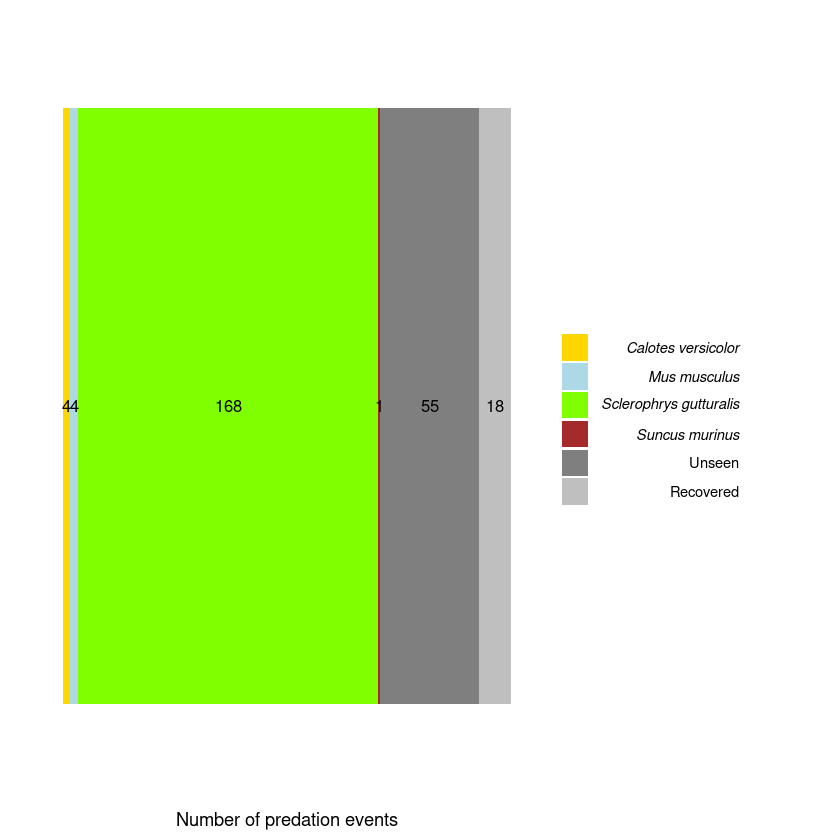

In [6]:
ggplot(data = df_cumsum,aes(x=plot, y=count, fill=factor(specie_name)))+
geom_bar(stat="identity",position = position_stack(reverse = TRUE))+
geom_text(aes(y=y_pos,label=count),color="black", hjust=0.5, size=3.5)+
#geom_text(aes(y=60,label=label),color="black", hjust=0.5, size=3)+
#ylim(c(0,65))+
#scale_y_discrete(limits = rev)+
coord_flip()+ 
scale_fill_manual(labels = rev(c("Recovered","Unseen",expression(italic("Suncus murinus")),expression(italic("Sclerophrys gutturalis")), expression(italic("Mus musculus")),expression(italic("Calotes versicolor")))),
                 values = rev(c("grey75","grey50","brown","chartreuse","lightblue","gold")),name="")+
theme_minimal()+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),axis.text.x=element_blank())+
theme(legend.position="right",
#      legend.text = element_text(margin = margin(t = 10, b =10 , unit = "pt")),
     legend.box.margin = margin(c(0, 50, 0, 0)))+
xlab("")+ylab("Number of predation events")
#ggsave('fig2022/pred_by_pred.pdf', width = 250, height = 100, units = "mm")

# Difference between plots ?

In [7]:
df_tot = read.table('recap_PS_sans_RT.csv',h=TRUE, sep =',')
head(df_tot)

date     plot session spot weevils_in weevils_out eggs_in eggs_out adult1
1 20_09_17 BM   BM1     1BM1 2          2           10      4              
2 20_09_17 BM   BM1     2BM1 2          2           10      8              
3 20_09_17 BM   BM1     3BM1 2          2           10      7              
4 20_09_17 BM   BM1     4BM1 2          2           10      4              
5 20_10_05 BM   BM2     1BM2 2          2           10      5              
6 20_10_05 BM   BM2     2BM2 2          2           10      9              
  adult2 eggs pred other_death
1             0    2          
2             0    2          
3             0    0          
4             0    1          
5             0    2          
6             0    1

In [8]:
df_tot = df_tot%>%
mutate(pred_rate = (weevils_in - weevils_out)/weevils_in)
head(df_tot)

date     plot session spot weevils_in weevils_out eggs_in eggs_out adult1
1 20_09_17 BM   BM1     1BM1 2          2           10      4              
2 20_09_17 BM   BM1     2BM1 2          2           10      8              
3 20_09_17 BM   BM1     3BM1 2          2           10      7              
4 20_09_17 BM   BM1     4BM1 2          2           10      4              
5 20_10_05 BM   BM2     1BM2 2          2           10      5              
6 20_10_05 BM   BM2     2BM2 2          2           10      9              
  adult2 eggs pred other_death pred_rate
1             0    2           0        
2             0    2           0        
3             0    0           0        
4             0    1           0        
5             0    2           0        
6             0    1           0

In [9]:
kruskal.test(df_tot$pred_rate~df_tot$plot)


	Kruskal-Wallis rank sum test

data:  df_tot$pred_rate by df_tot$plot
Kruskal-Wallis chi-squared = 26.225, df = 4, p-value = 2.851e-05


# Chi2

In [10]:
# base df
pred_plot_df = df %>% 
  group_by(plot,specie_name) %>% 
  summarise(count = n())
head(pred_plot_df)

`summarise()` has grouped output by 'plot'. You can override using the `.groups` argument.


plot specie_name        count
1 BM   suncus_murinus      5   
2 LP   calotes_versicolor  2   
3 LP   mus_musculus        1   
4 LP   suncus_murinus     19   
5 LP   unseen              3   
6 PC   calotes_versicolor  2

In [11]:
# counting recovered weevils
recovered_df = pred_plot_df %>%
    group_by(plot)%>%
    summarise(pred_tot = sum(count))%>%
    mutate(count = 50 - pred_tot)%>% # we know how many weevils were deposed
    mutate(specie_name = 'zrecovered')%>% # 'recovered' with Z not to bother with alphabetical ordering of classes
    select(-c(pred_tot))
plot_df = bind_rows(pred_plot_df,recovered_df)
plot_df

plot specie_name            count
1  BM   suncus_murinus          5   
2  LP   calotes_versicolor      2   
3  LP   mus_musculus            1   
4  LP   suncus_murinus         19   
5  LP   unseen                  3   
6  PC   calotes_versicolor      2   
7  PC   suncus_murinus          2   
8  PC   unseen                  3   
9  PE   mus_musculus            1   
10 PE   Sclerophrys_gutturalis  1   
11 PE   suncus_murinus         25   
12 PE   unseen                  2   
13 SL   mus_musculus            2   
14 SL   suncus_murinus          4   
15 SL   unseen                 10   
16 BM   zrecovered             45   
17 LP   zrecovered             25   
18 PC   zrecovered             43   
19 PE   zrecovered             21   
20 SL   zrecovered             34

In [12]:
df_chi = plot_df%>%spread(plot,count)
df_chi[is.na(df_chi)] <- 0
indexes = df_chi$specie_name
df_chi = df_chi[,-1]
row.names(df_chi) = indexes
df_chi

Warning message:
“Setting row names on a tibble is deprecated.”


BM LP PC PE SL
calotes_versicolor      0  2  2  0  0
mus_musculus            0  1  0  1  2
Sclerophrys_gutturalis  0  0  0  1  0
suncus_murinus          5 19  2 25  4
unseen                  0  3  3  2 10
zrecovered             45 25 43 21 34

In [13]:
chisq.test(df_chi)

Warning message in chisq.test(df_chi):
“L’approximation du Chi-2 est peut-être incorrecte”



	Pearson's Chi-squared test

data:  df_chi
X-squared = 81.545, df = 20, p-value = 2.143e-09


--------------------------backup-------------------------------------

### Barplot identified predator by plot

In [10]:
# base df
pred_plot_df = df %>% 
  group_by(plot,specie_name) %>% 
  summarise(count = n())
head(pred_plot_df)

`summarise()` has grouped output by 'plot'. You can override using the `.groups` argument.


plot specie_name        count
1 BM   suncus_murinus      5   
2 LP   calotes_versicolor  2   
3 LP   mus_musculus        1   
4 LP   suncus_murinus     19   
5 LP   unseen              3   
6 PC   calotes_versicolor  2

In [9]:
# counting recovered weevils
recovered_df = pred_plot_df %>%
    group_by(plot)%>%
    summarise(pred_tot = sum(count))%>%
    mutate(count = 50 - pred_tot)%>% # we know how many weevils were deposed
    mutate(specie_name = 'zrecovered')%>% # 'recovered' with Z not to bother with alphabetical ordering of classes
    select(-c(pred_tot))
recovered_df

plot count specie_name
1 BM   45    zrecovered 
2 LP   25    zrecovered 
3 PC   43    zrecovered 
4 PE   21    zrecovered 
5 SL   34    zrecovered

In [18]:
plot_df = bind_rows(pred_plot_df,recovered_df)
#head(plot_df)

#adding cumulative sum column for label placement on plot
df_cumsum = plot_df%>%
arrange(plot)%>%
group_by(plot)%>%
mutate(y_pos = cumsum(count)- 0.5*count)

head(df_cumsum)

plot specie_name        count y_pos
1 BM   suncus_murinus      5     2.5 
2 BM   zrecovered         45    27.5 
3 LP   calotes_versicolor  2     1.0 
4 LP   mus_musculus        1     2.5 
5 LP   suncus_murinus     19    12.5 
6 LP   unseen              3    23.5

In [19]:
df_cumsum$label = NULL

for(i in 1:length(df_cumsum$plot)){
    if(df_cumsum$plot[i] == 'BM'){
        df_cumsum$label[i] = '0.10 ± 0.13'
    }
    if(df_cumsum$plot[i] == 'LP'){
        df_cumsum$label[i] = '0.50 ± 0.20'
    }
    if(df_cumsum$plot[i] == 'PC'){
        df_cumsum$label[i] = '0.14 ± 0.14'
    }
    if(df_cumsum$plot[i] == 'PE'){
        df_cumsum$label[i] = '0.58 ± 0.19'
    }
    if(df_cumsum$plot[i] == 'SL'){
        df_cumsum$label[i] = '0.32 ± 0.19'
    }

} 


Warning message:
“Unknown or uninitialised column: `label`.”


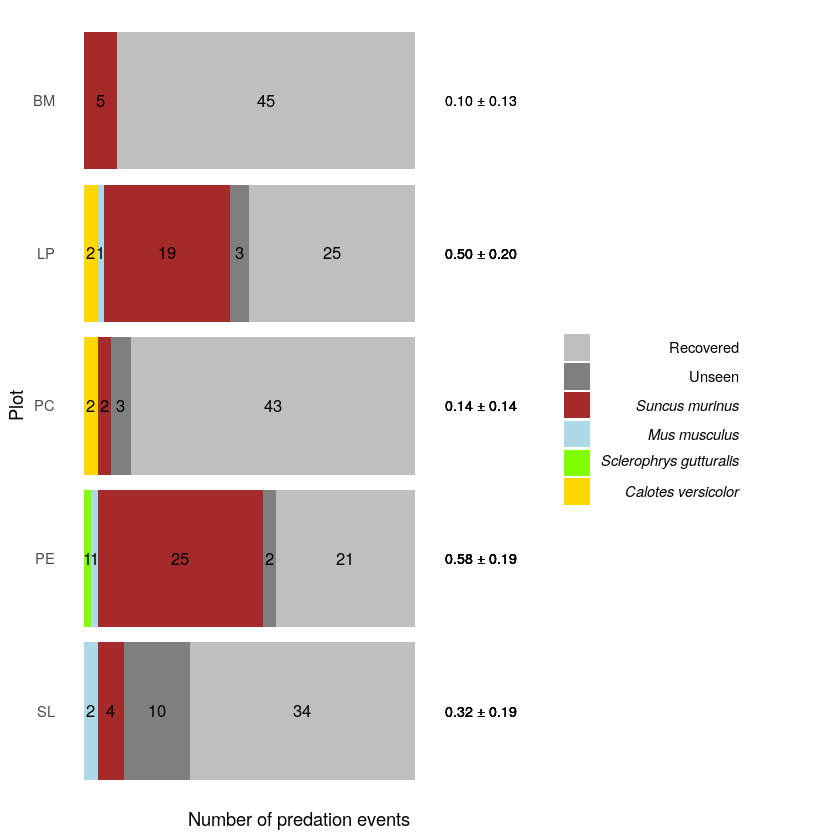

In [20]:
# legend on side and spaced to add illustrations

plots_reorder= c('SL','PE','PC','LP','BM')

ggplot(data = df_cumsum,aes(x=plot, y=count, fill=factor(specie_name, levels=c("zrecovered", "unseen", "suncus_murinus",'mus_musculus','Sclerophrys_gutturalis','calotes_versicolor'))))+
geom_bar(stat="identity")+
geom_text(aes(y=y_pos,label=count),color="black", hjust=0.5, size=3.5)+
geom_text(aes(y=60,label=label),color="black", hjust=0.5, size=3)+
scale_x_discrete(limits = plots_reorder)+ylim(c(0,65))+coord_flip()+ 
scale_fill_manual(labels = c("Recovered","Unseen",expression(italic("Suncus murinus")), expression(italic("Mus musculus")),expression(italic("Sclerophrys gutturalis")),expression(italic("Calotes versicolor"))),
                 values = c("grey75","grey50","brown","lightblue","chartreuse","gold"),name="")+
theme_minimal()+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),axis.text.x=element_blank())+
theme(legend.position="right",
#      legend.text = element_text(margin = margin(t = 10, b =10 , unit = "pt")),
     legend.box.margin = margin(c(0, 50, 0, 0)))+
xlab("Plot")+ylab("Number of predation events")

#ggsave('pred_by_plot_lg_mean.pdf', width = 200, height = 100, units = "mm")

### Predation by hour

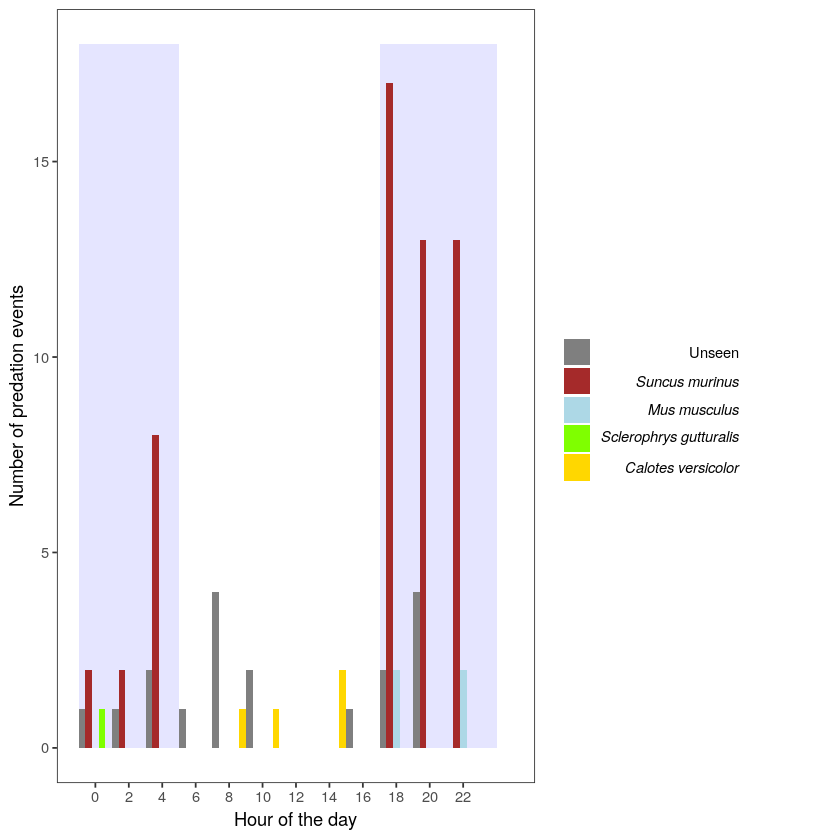

In [50]:
custom_breaks = c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
custom_breaks = c(0,2,4,6,8,10,12,14,16,18,20,22)
ggplot(df, aes(x=hour, fill=factor(specie_name, levels=c("unseen", "suncus_murinus",'mus_musculus','Sclerophrys_gutturalis','calotes_versicolor')))) +
#geom_vline(aes(xintercept = 16), colour="black", size=10, alpha=0.10)+
# geom_bar(position="identity", stat="identity")
annotate("rect", xmin=c(17,-1), xmax=c(24,5), ymin=c(0,0) , ymax=c(18,18), alpha=0.1, fill="blue")+
geom_histogram(position="dodge",binwidth=2)+
scale_x_continuous(breaks=custom_breaks,minor_breaks=NULL)+
scale_y_continuous(minor_breaks = NULL)+
scale_fill_manual(labels = c("Unseen",expression(italic("Suncus murinus")), expression(italic("Mus musculus")),expression(italic("Sclerophrys gutturalis")),expression(italic("Calotes versicolor"))),
                 values = c("grey50","brown","lightblue","chartreuse","gold"),name="")+
theme_bw()+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
    legend.position="right",
#      legend.text = element_text(margin = margin(t = 10, b =10 , unit = "pt")),
     legend.box.margin = margin(c(0, 50, 0, 0)))+
xlab("Hour of the day")+ylab("Number of predation events")

#ggsave('pred_by_hour_lg.pdf', width = 200, height = 100, units = "mm")

### Mean predation by plot

In [1]:
df_tot = read.table('recap_PS_sans_RT.csv',h=TRUE, sep =',')
head(df_tot)


date     plot session spot weevils_in weevils_out eggs_in eggs_out adult1
1 20_09_17 BM   BM1     1BM1 2          2           10      4              
2 20_09_17 BM   BM1     2BM1 2          2           10      8              
3 20_09_17 BM   BM1     3BM1 2          2           10      7              
4 20_09_17 BM   BM1     4BM1 2          2           10      4              
5 20_10_05 BM   BM2     1BM2 2          2           10      5              
6 20_10_05 BM   BM2     2BM2 2          2           10      9              
  adult2 eggs pred other_death
1             0    2          
2             0    2          
3             0    0          
4             0    1          
5             0    2          
6             0    1

In [14]:
pred = plot_df[plot_df$specie_name != 'zrecovered',]
pred

sum(pred[pred$specie_name != 'unseen',]$count)

sum(plot_df[plot_df$specie_name != 'unseen',]$count)/82

plot specie_name            count
1  BM   suncus_murinus          5   
2  LP   calotes_versicolor      2   
3  LP   mus_musculus            1   
4  LP   suncus_murinus         19   
5  LP   unseen                  3   
6  PC   calotes_versicolor      2   
7  PC   suncus_murinus          2   
8  PC   unseen                  3   
9  PE   mus_musculus            1   
10 PE   Sclerophrys_gutturalis  1   
11 PE   suncus_murinus         25   
12 PE   unseen                  2   
13 SL   mus_musculus            2   
14 SL   suncus_murinus          4   
15 SL   unseen                 10

[1] 64

[1] 2.829268

In [17]:
df_temp = df_tot%>%
mutate(prop_pred = (weevils_in - weevils_out)/weevils_in)

#df_temp

df_mean = df_temp%>%
group_by(plot)%>%
summarise(mean_pred = mean(prop_pred))


df_sd = df_temp%>%
group_by(plot)%>%
summarise(sd_pred = sd(prop_pred))%>%
mutate(se_pred = sd_pred/sqrt(5))

df_plot = left_join(df_mean,df_sd)

df_plot

Joining, by = "plot"



plot mean_pred sd_pred   se_pred  
1 BM   0.10      0.2886751 0.1290994
2 LP   0.50      0.4564355 0.2041241
3 PC   0.14      0.3068659 0.1372346
4 PE   0.58      0.4252450 0.1901754
5 SL   0.32      0.4301163 0.1923538

In [20]:
# Calcul binomial

df_temp = df_tot%>%
mutate(prop_pred = (weevils_in - weevils_out)/weevils_in)

#df_temp

# df_se = df_temp%>%
# group_by(plot)%>%
# summarise(mean_pred = mean(prop_pred),
#          se_pred = sqrt((10*prop_pred*(1-prop_pred))/5))

# df_se

`summarise()` has grouped output by 'plot'. You can override using the `.groups` argument.



plot mean_pred se_pred  
1   BM   0.1       0.0000000
2   BM   0.1       0.0000000
3   BM   0.1       0.0000000
4   BM   0.1       0.0000000
5   BM   0.1       0.0000000
6   BM   0.1       0.0000000
7   BM   0.1       0.0000000
8   BM   0.1       0.0000000
9   BM   0.1       0.0000000
10  BM   0.1       0.0000000
11  BM   0.1       0.0000000
12  BM   0.1       0.0000000
13  BM   0.1       0.0000000
14  BM   0.1       0.0000000
15  BM   0.1       0.0000000
16  BM   0.1       0.0000000
17  BM   0.1       0.0000000
18  BM   0.1       0.0000000
19  BM   0.1       0.0000000
20  BM   0.1       0.0000000
21  BM   0.1       0.0000000
22  BM   0.1       0.0000000
23  BM   0.1       0.0000000
24  BM   0.1       0.7071068
25  BM   0.1       0.0000000
26  LP   0.5       0.0000000
27  LP   0.5       0.0000000
28  LP   0.5       0.0000000
29  LP   0.5       0.0000000
30  LP   0.5       0.0000000
⋮   ⋮    ⋮         ⋮        
96  PE   0.58      0.0000000
97  PE   0.58      0.7071068
98  PE   0.58      0.7071068
99  PE   0.58      0.7071068
100 PE   0.58      0.0000000
101 SL   0.32      0.0000000
102 SL   0.32      0.0000000
103 SL   0.32      0.0000000
104 SL   0.32      0.0000000
105 SL   0.32      0.0000000
106 SL   0.32      0.0000000
107 SL   0.32      0.0000000
108 SL   0.32      0.0000000
109 SL   0.32      0.0000000
110 SL   0.32      0.0000000
111 SL   0.32      0.0000000
112 SL   0.32      0.0000000
113 SL   0.32      0.0000000
114 SL   0.32      0.0000000
115 SL   0.32      0.0000000
116 SL   0.32      0.7071068
117 SL   0.32      0.0000000
118 SL   0.32      0.0000000
119 SL   0.32      0.0000000
120 SL   0.32      0.0000000
121 SL   0.32      0.7071068
122 SL   0.32      0.0000000
123 SL   0.32      0.0000000
124 SL   0.32      0.7071068
125 SL   0.32      0.7071068

In [34]:
df_plot2 = df_plot

df_plot2$min_err = NULL

for (i in 1:length(df_plot2$plot)){
    
    if (df_plot2$mean_pred[i] -df_plot2$sd_pred[i] <0){
        df_plot2$min_err[i] = 0
    }
    else{df_plot2$min_err[i] = df_plot2$mean_pred[i] -df_plot2$sd_pred[i]}
}

df_plot2


Warning message:
“Unknown or uninitialised column: 'min_err'.”


plot mean_pred sd_pred   min_err   
1 BM   0.10      0.2886751 0.00000000
2 LP   0.50      0.4564355 0.04356454
3 PC   0.14      0.3068659 0.00000000
4 PE   0.58      0.4252450 0.15475497
5 SL   0.32      0.4301163 0.00000000

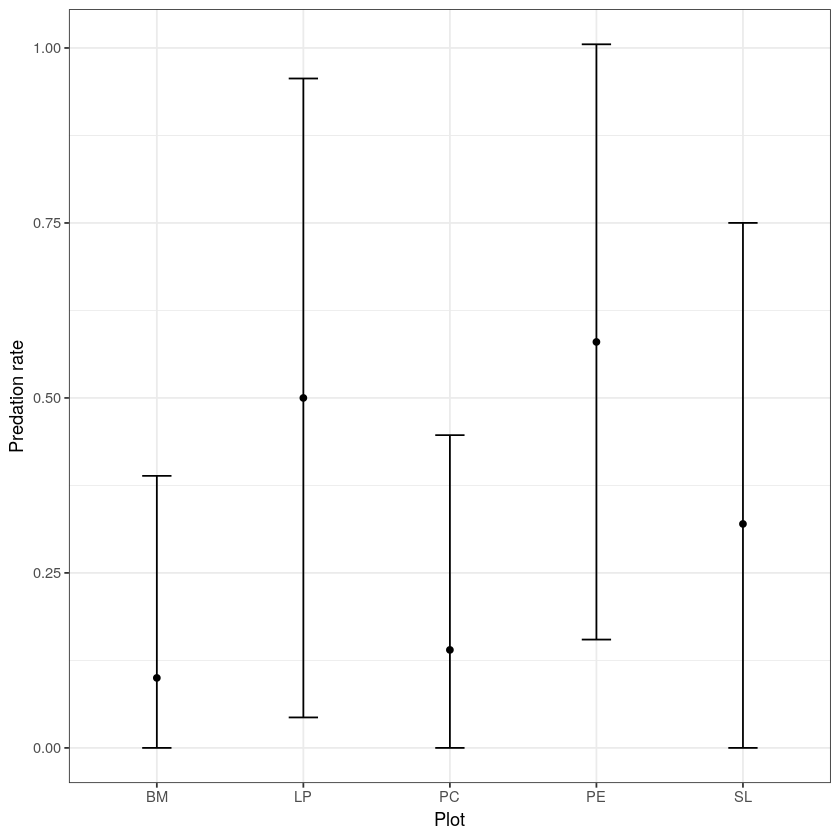

In [35]:
ggplot(df_plot2, aes(x=plot, y = mean_pred))+
geom_point()+
geom_errorbar(aes(ymin=min_err, ymax=mean_pred+sd_pred), width=.2)+
theme_bw()+
xlab("Plot")+ylab("Predation rate")

# ggsave("mean_pred_by_plot.png",, width = 100, height = 100, units = "mm")

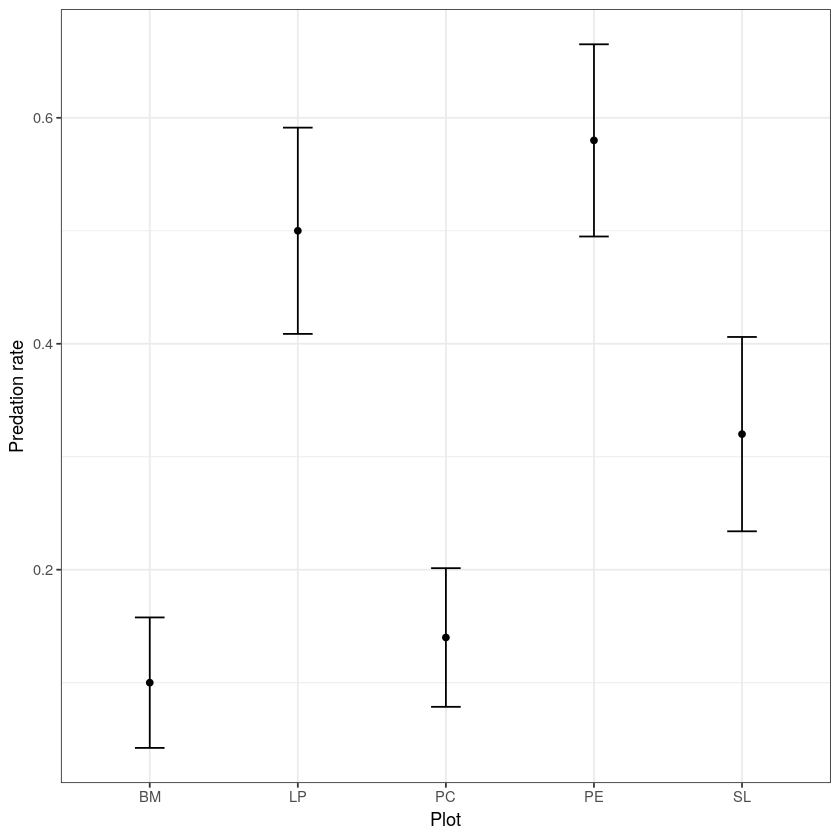

In [36]:
ggplot(df_plot2, aes(x=plot, y = mean_pred))+
geom_point()+
geom_errorbar(aes(ymin=mean_pred-(sd_pred/5), ymax=mean_pred+(sd_pred/5)), width=.2)+
theme_bw()+
xlab("Plot")+ylab("Predation rate")
ggsave("mean_pred_by_plot.png",, width = 100, height = 100, units = "mm")

In [11]:
df_temp

date     plot session spot weevils_in weevils_out eggs_in eggs_out
1   20_09_17 BM   BM1     1BM1 2          2           10       4      
2   20_09_17 BM   BM1     2BM1 2          2           10       8      
3   20_09_17 BM   BM1     3BM1 2          2           10       7      
4   20_09_17 BM   BM1     4BM1 2          2           10       4      
5   20_10_05 BM   BM2     1BM2 2          2           10       5      
6   20_10_05 BM   BM2     2BM2 2          2           10       9      
7   20_10_05 BM   BM2     3BM2 2          2           10      10      
8   20_10_05 BM   BM2     4BM2 2          2           10       5      
9   20_10_05 BM   BM2     5BM2 2          2           10       9      
10  20_10_19 BM   BM3     1BM3 2          2           10       5      
11  20_10_19 BM   BM3     3BM3 2          2           10       9      
12  20_10_19 BM   BM3     4BM3 2          2           10       1      
13  20_10_19 BM   BM3     5BM3 2          2           10       1      
14  20_11_05 BM   BM4     1BM4 2          2           10       5      
15  20_11_05 BM   BM4     2BM4 2          2           10       6      
16  20_11_05 BM   BM4     3BM4 2          2           10       5      
17  20_11_05 BM   BM4     4BM4 2          2           10       9      
18  20_11_23 BM   BM5     1BM5 2          2           10       0      
19  20_11_23 BM   BM5     2BM5 2          2           10       0      
20  20_11_23 BM   BM5     3BM5 2          2           10       8      
21  20_11_23 BM   BM5     4BM5 2          2           10       9      
22  20_11_23 BM   BM5     5BM5 2          2           10       5      
23  20_09_03 LP   LP1     1LP1 2          2           10      10      
24  20_09_03 LP   LP1     3LP1 2          2           10       2      
25  20_09_03 LP   LP1     4LP1 2          2           10       3      
26  20_09_28 LP   LP2     1LP2 2          2           10       9      
27  20_11_30 LP   LP2     2LP2 2          2           10       0      
28  20_09_28 LP   LP2     4LP2 2          2           10       3      
29  20_10_15 LP   LP3     1LP3 2          2           10       0      
30  20_10_15 LP   LP3     2LP3 2          2           10       0      
⋮   ⋮        ⋮    ⋮       ⋮    ⋮          ⋮           ⋮       ⋮       
96  20_10_22 PC   PC3     4PC3 2          1           10       9      
97  20_11_19 PC   PC5     5PC5 2          1           10       5      
98  20_09_14 PE   PE1     3PE1 2          1           10       7      
99  20_09_14 PE   PE1     4PE1 2          0           10       4      
100 20_09_14 PE   PE1     5PE1 2          1           10       4      
101 20_11_30 PE   PE2     1PE2 2          0           10       3      
102 20_09_21 PE   PE2     2PE2 2          0           10       6      
103 20_09_21 PE   PE2     4PE2 2          0           10       8      
104 20_09_21 PE   PE2     5PE2 2          0           10       8      
105 20_10_08 PE   PE3     1PE3 2          0           10       0      
106 20_10_08 PE   PE3     3PE3 2          0           10       1      
107 20_10_08 PE   PE3     4PE3 2          0           10       0      
108 20_11_30 PE   PE3     5PE3 2          1           10       2      
109 20_10_26 PE   PE4     1PE4 2          1           10       0      
110 20_10_26 PE   PE4     4PE4 2          0           10       2      
111 20_10_26 PE   PE4     5PE4 2          0           10       2      
112 20_11_12 PE   PE5     1PE5 2          1           10       0      
113 20_11_12 PE   PE5     3PE5 2          1           10       6      
114 20_11_12 PE   PE5     4PE5 2          1           10      10      
115 20_11_12 PE   PE5     5PE5 2          0           10       0      
116 20_09_07 SL   SL1     3SL1 2          1           10       3      
117 20_09_07 SL   SL1     4SL1 2          0           10       2      
118 20_09_07 SL   SL1     5SL1 2          0           10       0      
119 20_09_25 SL   SL2     3SL2 2          0           10      10      
120 20_09_25 SL   SL2     4S

### Relation aux dégâts

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
data = read.table('recap_degats.csv', h=T, sep = ',')
# data$colonie = as.factor(data$colonie)

data =data%>%
mutate(inc = case_when(prop_degats != 0 ~ 1,TRUE ~ 0))%>% # count when prop_degats != 0
group_by(parcelle)%>% 
summarize(count = n(),
          incidence = sum(inc),
          mean = mean(prop_degats, na.rm = TRUE), 
          sd = sd(prop_degats, na.rm = TRUE))%>%
mutate(prop_inc = incidence/count)%>%
rename(plot=parcelle)

head(data)

plot count incidence mean        sd         prop_inc 
1 BM   20    6         0.019612750 0.04377226 0.3000000
2 LP   16    7         0.023922125 0.04728470 0.4375000
3 PC   17    0         0.000000000 0.00000000 0.0000000
4 PE   14    5         0.009310357 0.01613714 0.3571429
5 SL   16    8         0.052420750 0.06483137 0.5000000

In [3]:
df_tot = read.table('recap_PS_sans_RT.csv',h=TRUE, sep =',')
# head(df_tot)
df_temp = df_tot%>%
mutate(prop_pred = (weevils_in - weevils_out)/weevils_in)


df_mean = df_temp%>%
group_by(plot)%>%
summarise(mean_pred = mean(prop_pred))


df_sd = df_temp%>%
group_by(plot)%>%
summarise(sd_pred = sd(prop_pred))

df_plot = left_join(df_mean,df_sd)

df_plot$captures=c(14,2,0,0,5)
df_plot

Joining, by = "plot"



plot mean_pred sd_pred   captures
1 BM   0.10      0.2886751 14      
2 LP   0.50      0.4564355  2      
3 PC   0.14      0.3068659  0      
4 PE   0.58      0.4252450  0      
5 SL   0.32      0.4301163  5

In [4]:
recap = inner_join(data,df_plot)
recap

Joining, by = "plot"



plot count incidence mean        sd         prop_inc  mean_pred sd_pred  
1 BM   20    6         0.019612750 0.04377226 0.3000000 0.10      0.2886751
2 LP   16    7         0.023922125 0.04728470 0.4375000 0.50      0.4564355
3 PC   17    0         0.000000000 0.00000000 0.0000000 0.14      0.3068659
4 PE   14    5         0.009310357 0.01613714 0.3571429 0.58      0.4252450
5 SL   16    8         0.052420750 0.06483137 0.5000000 0.32      0.4301163
  captures
1 14      
2  2      
3  0      
4  0      
5  5

In [5]:
recap = recap%>%
rename(mean_dmg = mean)%>%
rename(sd_dmg = sd)%>%
select(-c(incidence))%>%
rename(incidence=prop_inc)

write.csv(recap, "recap_dmg_pred.csv", row.names=FALSE)


Call:
lm(formula = recap$mean_dmg ~ recap$mean_pred)

Residuals:
         1          2          3          4          5 
 0.0005426  0.0013729 -0.0194180 -0.0139346  0.0314371 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)
(Intercept)     0.018200   0.020357   0.894    0.437
recap$mean_pred 0.008698   0.053706   0.162    0.882

Residual standard error: 0.02282 on 3 degrees of freedom
Multiple R-squared:  0.008667,	Adjusted R-squared:  -0.3218 
F-statistic: 0.02623 on 1 and 3 DF,  p-value: 0.8816


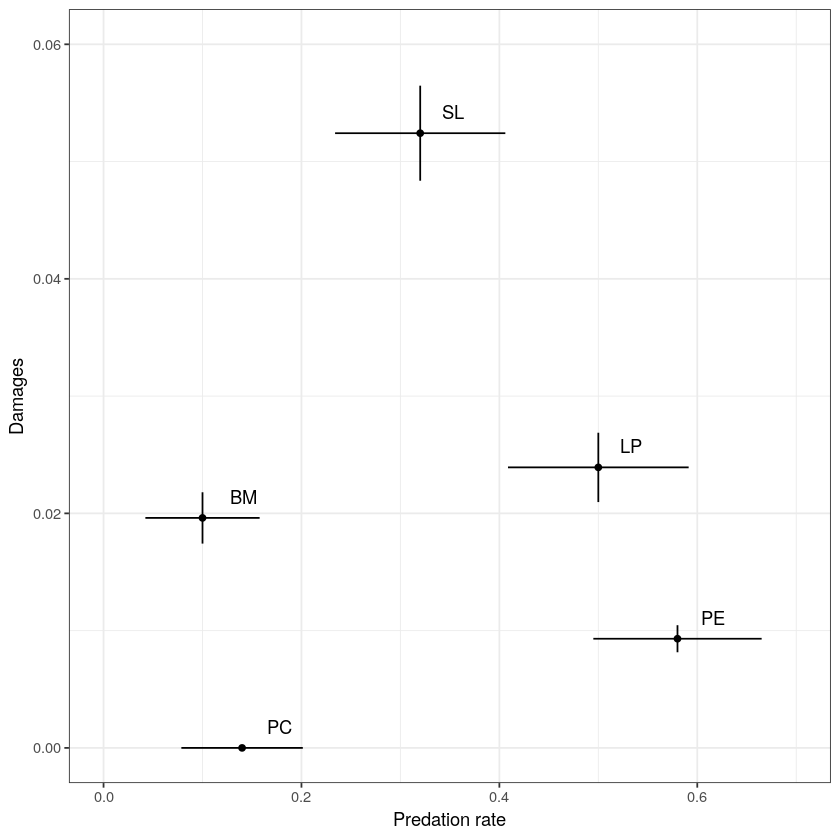

In [16]:
ggplot(recap,aes(x=mean_pred,y=mean_dmg,label=plot))+
geom_point()+
geom_errorbar(aes(ymin=mean_dmg-(sd_dmg/count), ymax=mean_dmg+(sd_dmg/count)), width=.0)+
geom_errorbarh(aes(xmin=mean_pred-(sd_pred/5), xmax=mean_pred+(sd_pred/5)), height=.0)+
geom_text(hjust=-1,vjust=-1)+
theme_bw()+xlab('Predation rate')+ylab('Damages')+
xlim(c(0.0,0.7))+ylim(c(0.0,0.06))

ggsave("pred_vs_damages.png",, width = 100, height = 100, units = "mm")

summary(lm(recap$mean_dmg~recap$mean_pred))


Call:
lm(formula = recap$mean_dmg ~ recap$captures)

Residuals:
        1         2         3         4         5 
-0.011642  0.005159 -0.016681 -0.007371  0.030535 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)
(Intercept)    0.016681   0.012509   1.333    0.275
recap$captures 0.001041   0.001865   0.558    0.616

Residual standard error: 0.02181 on 3 degrees of freedom
Multiple R-squared:  0.0941,	Adjusted R-squared:  -0.2079 
F-statistic: 0.3116 on 1 and 3 DF,  p-value: 0.6156


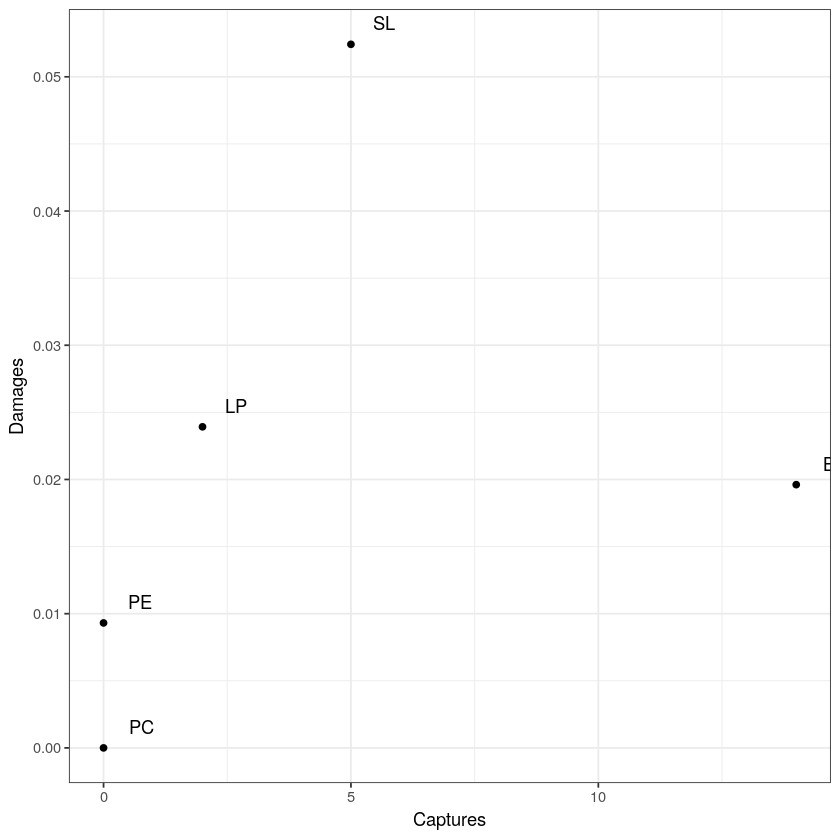

In [14]:
ggplot(recap,aes(x=captures,y=mean_dmg,label=plot))+
geom_point()+
# geom_errorbar(aes(ymin=mean_dmg-(sd_dmg/count), ymax=mean_dmg+(sd_dmg/count)), width=.0)+
# geom_errorbarh(aes(xmin=mean_pred-(sd_pred/5), xmax=mean_pred+(sd_pred/5)), height=.0)+
geom_text(hjust=-1,vjust=-1)+
theme_bw()+xlab('Captures')+ylab('Damages')#+xlim(c(0.0,0.7))+ylim(c(0.0,0.06))

summary(lm(recap$mean_dmg~recap$captures))

Warning message:
“Removed 4 rows containing missing values (geom_smooth).”


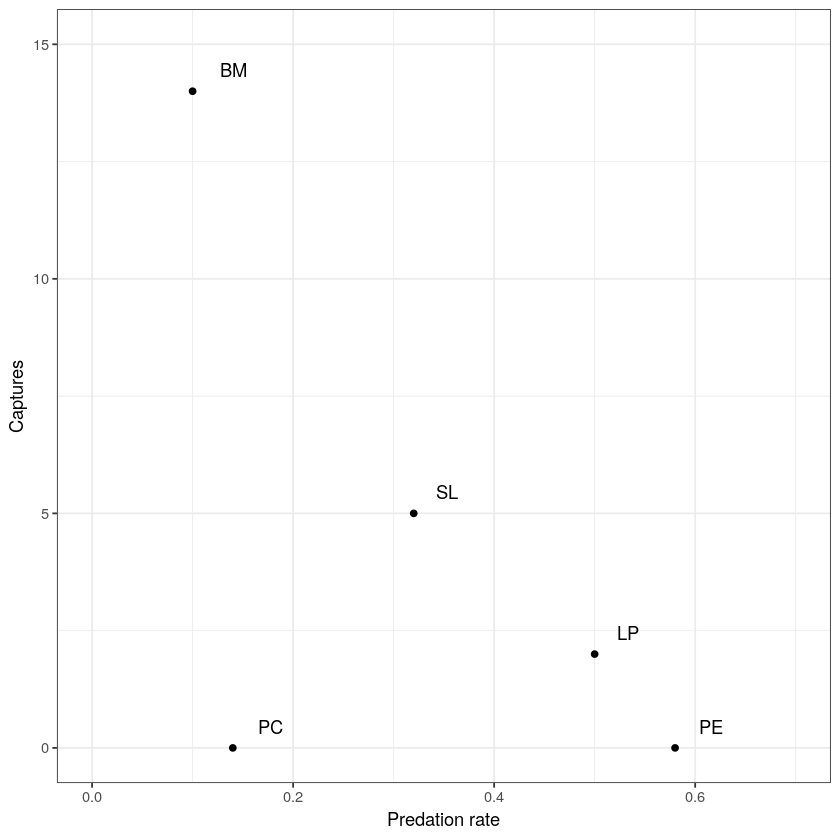

Warning message:
“Removed 4 rows containing missing values (geom_smooth).”



Call:
lm(formula = recap$mean_pred ~ recap$captures)

Residuals:
        1         2         3         4         5 
-0.021111  0.125556 -0.276667  0.163333  0.008889 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)     0.41667    0.11447   3.640   0.0357 *
recap$captures -0.02111    0.01706  -1.237   0.3041  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1996 on 3 degrees of freedom
Multiple R-squared:  0.3378,	Adjusted R-squared:  0.1171 
F-statistic:  1.53 on 1 and 3 DF,  p-value: 0.3041



Call:
lm(formula = recap[recap$plot != "PC", ]$mean_pred ~ recap[recap$plot != 
    "PC", ]$captures)

Residuals:
       1        2        3        4 
 0.02048  0.01525  0.02771 -0.06344 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)                           0.552288   0.036531  15.118  0.00435 **
recap[recap$plot != "PC", ]$captures -0.033769   0.004871  -6.933  0.02018 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05218 on 2 degrees of freedom
Multiple R-squared:  0.9601,	Adjusted R-squared:  0.9401 
F-statistic: 48.07 on 1 and 2 DF,  p-value: 0.02018


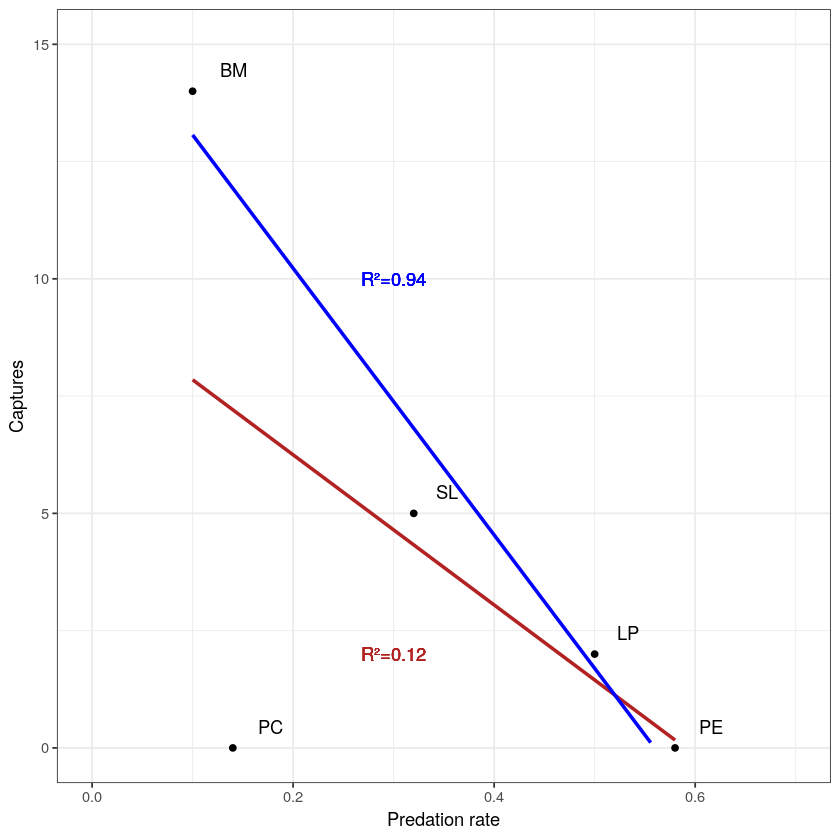

In [11]:
ggplot(recap,aes(x=mean_pred,y=captures,label=plot))+
geom_point()+
geom_text(hjust=-1,vjust=-1)+
theme_bw()+xlab('Predation rate')+ylab('Captures')+
xlim(c(0.0,0.7))+ylim(c(0.0,15))

ggsave("pred_vs_captures.png",, width = 100, height = 100, units = "mm")

ggplot(recap,aes(x=mean_pred,y=captures,label=plot))+
geom_point()+
geom_smooth(method = 'lm',se=FALSE, color ='firebrick')+
geom_smooth(data=recap[recap$plot != 'PC',],method = 'lm',se=FALSE, color ='blue')+
geom_text(hjust=-1,vjust=-1)+
geom_text(aes(x=0.3,y=10),label='R²=0.94', col = 'blue')+
geom_text(aes(x=0.3,y=2),label='R²=0.12', col = 'firebrick')+
theme_bw()+xlab('Predation rate')+ylab('Captures')+
xlim(c(0.0,0.7))+ylim(c(0.0,15))

ggsave("pred_vs_captures-PC.png",, width = 100, height = 100, units = "mm")

summary(lm(recap$mean_pred~recap$captures))
summary(lm(recap[recap$plot != 'PC',]$mean_pred~recap[recap$plot != 'PC',]$captures))

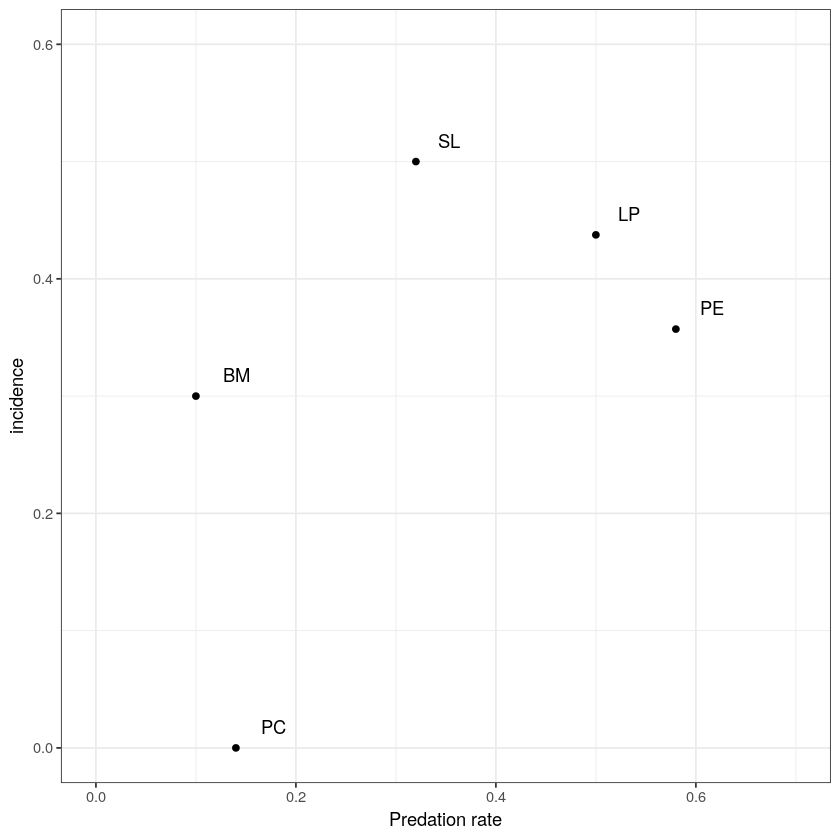

In [63]:
ggplot(recap,aes(x=mean_pred,y=incidence,label=plot))+
geom_point()+
geom_text(hjust=-1,vjust=-1)+
theme_bw()+xlab('Predation rate')+ylab('incidence')+xlim(c(0.0,0.7))+ylim(c(0.0,0.6))
# xlim(c(0.0,0.7))+ylim(c(0.0,15))
ggsave("pred_vs_incidence.png",, width = 100, height = 100, units = "mm")


## Captures general

In [53]:
library(dplyr)

In [84]:
df_cap = read.table('captures_charancons/recap.csv',h=TRUE, sep =',')
df_cap

plot trap date     cap
1  BM   1    16/09/20 3  
2  BM   2    16/09/20 3  
3  BM   1    30/09/20 4  
4  BM   2    30/09/20 4  
5  LP   1    30/09/20 1  
6  LP   2    30/09/20 1  
7  LP   1    15/10/20 0  
8  LP   2    15/10/20 0  
9  PC   1    16/09/20 0  
10 PC   2    16/09/20 0  
11 PC   1    30/09/20 0  
12 PC   2    30/09/20 0  
13 PE   1    16/09/20 0  
14 PE   2    16/09/20 0  
15 PE   1    30/09/20 0  
16 PE   2    30/09/20 0  
17 SL   1    30/09/20 0  
18 SL   2    30/09/20 1  
19 SL   1    15/10/20 2  
20 SL   2    15/10/20 2  
21 SL   1    14/02/20 1  
22 SL   1    18/02/20 1  
23 SL   1    21/02/20 0  
24 SL   1    25/02/20 1  
25 SL   1    28/02/20 3  
26 SL   1    06/03/20 0  
27 SL   2    14/02/20 0  
28 SL   2    18/02/20 1  
29 SL   2    21/02/20 0  
30 SL   2    25/02/20 0  
⋮  ⋮    ⋮    ⋮        ⋮  
39 LP   2    14/02/20  1 
40 LP   2    18/02/20  1 
41 LP   2    21/02/20  1 
42 LP   2    25/02/20  0 
43 LP   2    28/02/20  1 
44 LP   2    06/03/20  1 
45 BM   1    14/02/20 10 
46 BM   1    18/02/20 10 
47 BM   1    21/02/20 12 
48 BM   1    25/02/20 10 
49 BM   1    28/02/20  5 
50 BM   1    06/03/20  8 
51 BM   2    14/02/20  0 
52 BM   2    18/02/20  9 
53 BM   2    21/02/20 15 
54 BM   2    25/02/20 13 
55 BM   2    28/02/20  5 
56 BM   2    06/03/20  7 
57 PE   1    27/11/19  1 
58 PE   1    06/16/19  0 
59 PE   1    12/12/19  0 
60 PE   1    19/12/19  0 
61 PE   1    27/12/19  0 
62 PE   1    03/01/20  0 
63 PE   2    10/01/20  0 
64 PE   2    19/12/19  0 
65 PE   2    27/12/19  0 
66 PE   2    03/01/20  0 
67 PE   2    10/01/20  0 
68 PE   2    16/01/20  0

In [67]:
df_cap = df_cap%>%
    group_by(plot) %>%
    summarise(mean_cap = mean(cap), sd_cap=sd(cap), n_cap = n())%>%
    mutate(se_cap=sd_cap/sqrt(n_cap))

In [71]:
recap = inner_join(df_cap,df_plot)

Joining, by = "plot"



In [72]:
recap

plot mean_cap sd_cap   n_cap se_cap    mean_pred sd_pred   se_pred  
1 BM   7.3750   4.177320 16    1.0443299 0.10      0.2886751 0.1290994
2 LP   1.0625   1.236595 16    0.3091487 0.50      0.4564355 0.2041241
3 PC   0.0000   0.000000  4    0.0000000 0.14      0.3068659 0.1372346
4 PE   0.0625   0.250000 16    0.0625000 0.58      0.4252450 0.1901754
5 SL   1.0000   1.211060 16    0.3027650 0.32      0.4301163 0.1923538

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



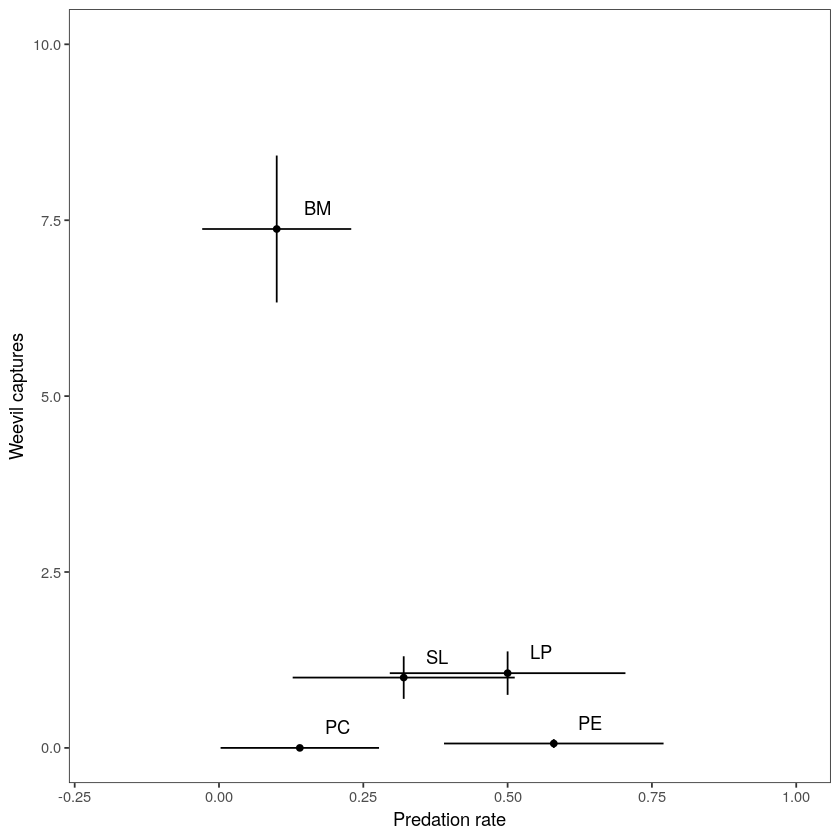

In [86]:
ggplot(recap,aes(x=mean_pred,y=mean_cap,label=plot))+
geom_point()+
# scale_y_continuous(trans = 'log10')+
geom_errorbar(aes(ymin=mean_cap-se_cap, ymax=mean_cap+se_cap), width=.0)+
geom_errorbarh(aes(xmin=mean_pred-se_pred, xmax=mean_pred+se_pred), height=.0)+
geom_text(hjust=-1,vjust=-1)+
theme_bw()+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
xlab('Predation rate')+ylab('Weevil captures')+
xlim(c(-0.2,1.0))+ylim(c(0.0,10))

# Degats à dire d'expert

In [3]:
library(dplyr)
library(ggplot2)

In [34]:
df_tot = read.table('recap_PS_sans_RT.csv',h=TRUE, sep =',')
# head(df_tot)
df_temp = df_tot%>%
mutate(pred_adults = (weevils_in - weevils_out)/weevils_in)%>%
mutate(pred_eggs = (eggs_in - eggs_out)/eggs_in)


df_mean_ad = df_temp%>%
group_by(plot)%>%
summarise(mean_pred_ad = mean(pred_adults))

df_mean_egg = df_temp%>%
group_by(plot)%>%
summarise(mean_pred_egg = mean(pred_eggs))

df_sd_ad = df_temp%>%
group_by(plot)%>%
summarise(sd_pred_ad = sd(pred_adults))

df_sd_egg = df_temp%>%
group_by(plot)%>%
summarise(sd_pred_egg = sd(pred_eggs))



df_plot_ad = left_join(df_mean_ad,df_sd_ad)
df_plot_egg = left_join(df_mean_egg,df_sd_egg)

df_plot = left_join(df_plot_ad,df_plot_egg)

df_plot$captures=c(14,2,0,0,5)
df_plot$classement=c(5,3,1,2,4)
df_plot$color = c('black','black','grey','black','black')
df_plot$alpha = c(1,1,0.5,1,1)
df_plot

Joining, by = "plot"

Joining, by = "plot"

Joining, by = "plot"



plot mean_pred_ad sd_pred_ad mean_pred_egg sd_pred_egg captures classement
1 BM   0.10         0.2886751  0.408         0.3026549   14       5         
2 LP   0.50         0.4564355  0.660         0.3547299    2       3         
3 PC   0.14         0.3068659  0.488         0.3503807    0       1         
4 PE   0.58         0.4252450  0.692         0.3390182    0       2         
5 SL   0.32         0.4301163  0.684         0.3647830    5       4         
  color alpha
1 black 1.0  
2 black 1.0  
3 grey  0.5  
4 black 1.0  
5 black 1.0

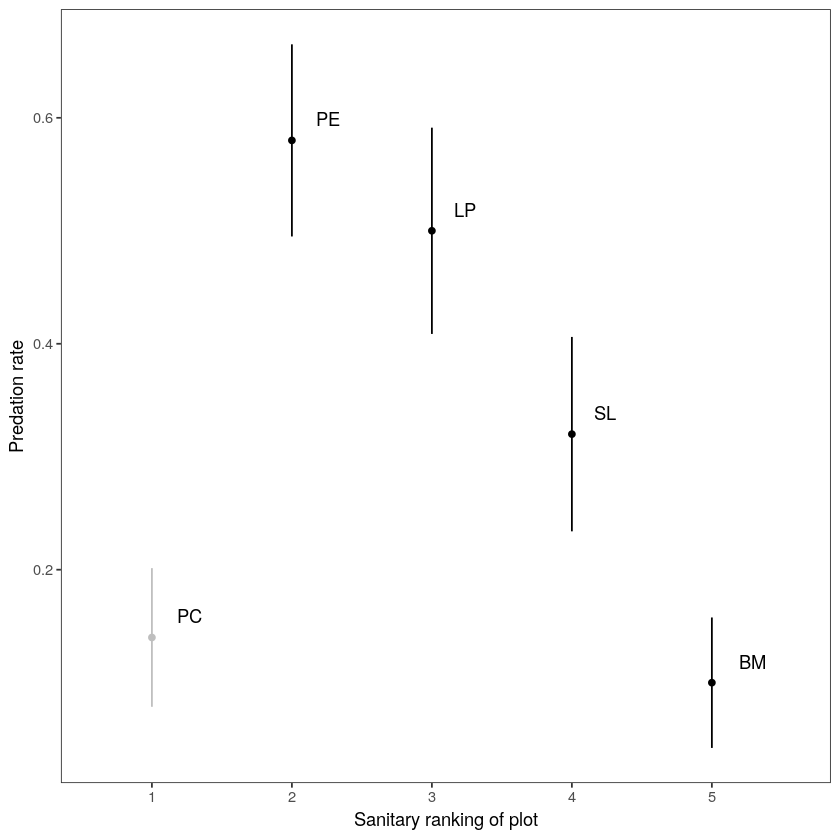

In [47]:
ggplot(df_plot,aes(x=classement, y=mean_pred_ad, label=plot))+
geom_point(color=df_plot$color)+
geom_errorbar(aes(ymin=mean_pred_ad-(sd_pred_ad/5), ymax=mean_pred_ad+(sd_pred_ad/5), width=.0),color=df_plot$color)+
geom_text(hjust=-1,vjust=-1)+
theme_bw()+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
ylab('Predation rate')+xlab('Sanitary ranking of plot')+xlim(0.6,5.6)

ggsave("pred_vs_classement.png",, width = 100, height = 100, units = "mm")

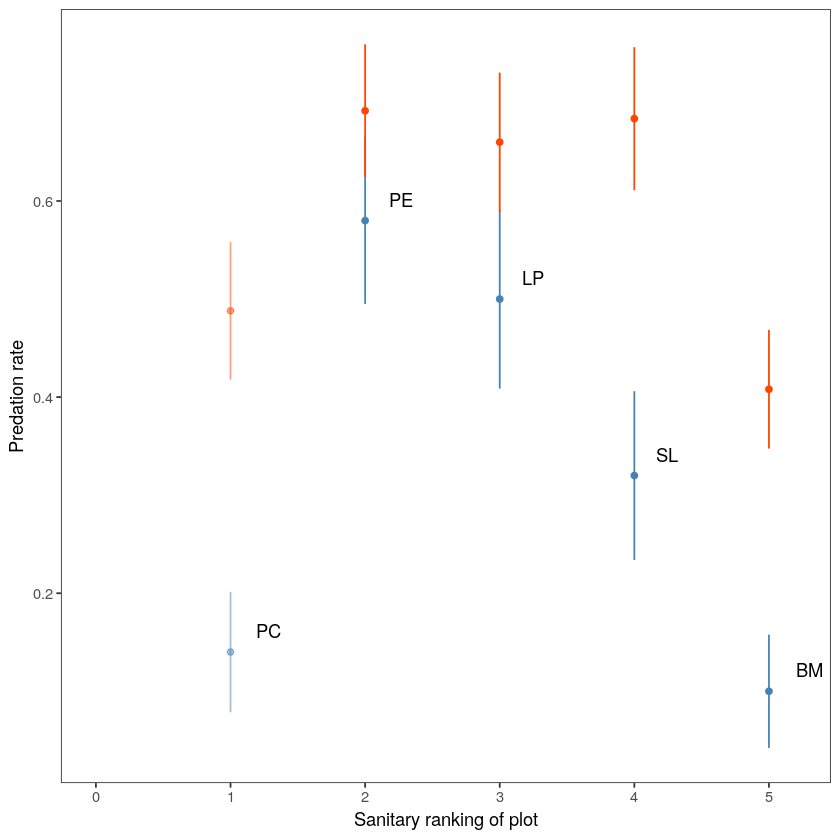

In [38]:
ggplot(df_plot,aes(x=classement, y=mean_pred_ad, label=plot))+
geom_point(color = 'steelblue', alpha=df_plot$alpha)+
geom_point(aes(y=mean_pred_egg),color = 'orangered',alpha=df_plot$alpha)+
geom_errorbar(aes(ymin=mean_pred_ad-(sd_pred_ad/5), ymax=mean_pred_ad+(sd_pred_ad/5), width=.0),alpha=df_plot$alpha,color='steelblue')+
geom_errorbar(aes(ymin=mean_pred_egg-(sd_pred_egg/5), ymax=mean_pred_egg+(sd_pred_egg/5), width=.0),alpha=df_plot$alpha,color='orangered')+
geom_text(hjust=-1,vjust=-1)+
theme_bw()+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
ylab('Predation rate')+xlab('Sanitary ranking of plot')+xlim(0,5.2)
ggsave("pred_vs_classement_tot.png",, width = 100, height = 100, units = "mm")